# Introduction

## Project Overview
Customer segmentation is a critical problem in marketing and business strategy. By understanding distinct customer groups, businesses can better allocate resources, personalize marketing campaigns, and enhance customer satisfaction. This project aims to segment customers into meaningful groups based on demographic and spending behavior using clustering, a core unsupervised learning technique.

Clustering helps uncover hidden patterns in data without the need for labeled outcomes, making it ideal for customer segmentation tasks. In this project, we will implement algorithms such as K-means and Hierarchical Clustering to group customers effectively.

## Problem Definition
In this project, we use clustering, an unsupervised learning technique, to group customers based on their demographic attributes (e.g., Age, Genre, Annual Income) and spending behavior (Spending Score). This analysis enables businesses to:
- Identify high-value customer segments for personalized marketing.
- Optimize marketing strategies and promotions for specific groups.
- Understand customer behavior for better resource allocation.

## Dataset Description
We use the **Mall Customers Dataset**, obtained from Kaggle. This dataset contains customer demographic information and spending behavior, enabling effective clustering analysis. The features include:
1. **CustomerID**: Unique identifier for each customer (not used in clustering).
2. **Genre**: Gender of the customer (Male/Female).
3. **Age**: Age of the customer (years).
4. **Annual Income (k)**: Annual income of the customer (in $k).
5. **Spending Score (1-100)**: A score assigned by the mall based on customer spending patterns (1-100).

## Data Provenance
The dataset is publicly available on Kaggle and is suitable for clustering due to its numeric and categorical features. The dataset was downloaded as `archive.zip` from [Kaggle: Mall Customers Dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers).

## Implementation Environment
The entire project was implemented using **Google Colab**, a cloud-based Jupyter notebook environment. This platform was chosen for its accessibility, ease of use, and ability to handle computational tasks efficiently. Key libraries used include:
- **Pandas**: For data manipulation and cleaning.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Scikit-learn**: For clustering models and evaluation metrics.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import zipfile
import os

# Upload the archive.zip file
from google.colab import files
uploaded = files.upload()

# Extract the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# List extracted files
print("Extracted files:")
print(os.listdir('/content/dataset'))

Mounted at /content/drive


Saving archive.zip to archive.zip
Extracted files:
['Mall_Customers.csv']


In [2]:
# Import libraries for data manipulation
import pandas as pd

# Load the dataset
file_path = '/content/dataset/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Preview the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Description

### Overview
The **Mall Customers Dataset** contains demographic and spending behavior data of 200 customers. It provides an excellent opportunity to explore customer segmentation using clustering techniques.

### Features
1. **CustomerID**: A unique identifier for each customer. This feature will not contribute to clustering.  
2. **Genre**: Gender of the customer (Male/Female). This categorical feature will require encoding.  
3. **Age**: The age of the customer (in years).  
4. **Annual Income (k)**: The annual income of the customer (in $k).  
5. **Spending Score (1-100)**: A score assigned by the mall based on customer spending behavior. Higher scores indicate higher spending.

### Initial Observations
- The dataset contains **200 rows** and **5 columns**.
- There are no missing values in the dataset.
- The feature `CustomerID` is irrelevant for clustering and will be excluded from the analysis.
- The column `Genre` is categorical and needs to be encoded.
- Numeric features (`Age`, `Annual Income`, `Spending Score`) may need scaling for clustering.

### Assumptions
- The sample size (200 customers) is representative of the overall population.
- Spending Score is an accurate reflection of customer behavior.

In [5]:
# Dataset overview
print("Dataset Information:")
data.info()

# Display summary statistics for numeric features
print("\nSummary Statistics:")
data.describe()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Summary Statistics:

Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Feature Distributions

Understanding the distribution of individual features is a crucial first step in exploratory data analysis. These visualizations provide insights into the spread and patterns of the dataset's features:

1. **Gender Distribution**:
   - A count plot visualizes the number of male and female customers. This helps us understand the dataset's gender balance, which may influence clustering results.

2. **Age Distribution**:
   - A histogram shows the distribution of customer ages, providing insights into the age demographics of the mall's customers.

3. **Annual Income Distribution**:
   - A histogram reveals the spread of customers' annual incomes, helping identify high- or low-income segments.

4. **Spending Score Distribution**:
   - A histogram shows the spending scores assigned to customers by the mall. Peaks in this distribution may indicate potential clusters of high and low spenders.

These visualizations help uncover patterns, anomalies, and the overall composition of the dataset, laying the foundation for clustering.

<ipython-input-6-250f381fd34b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='pastel')


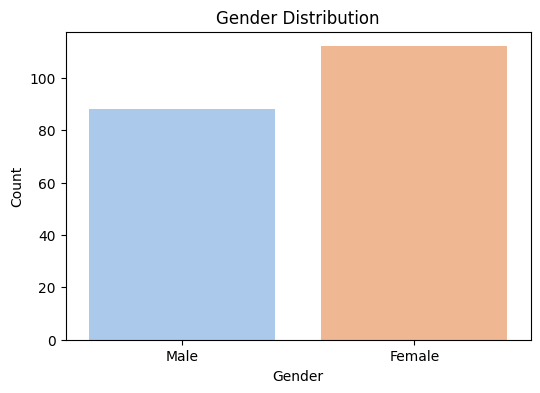

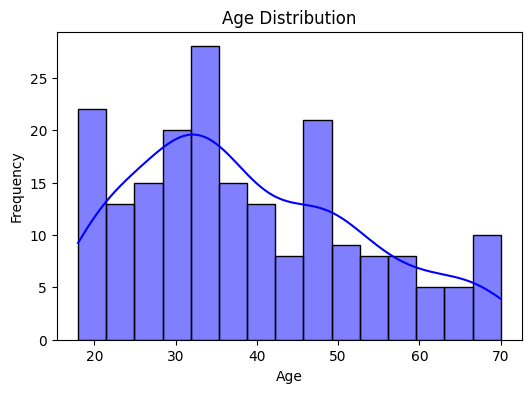

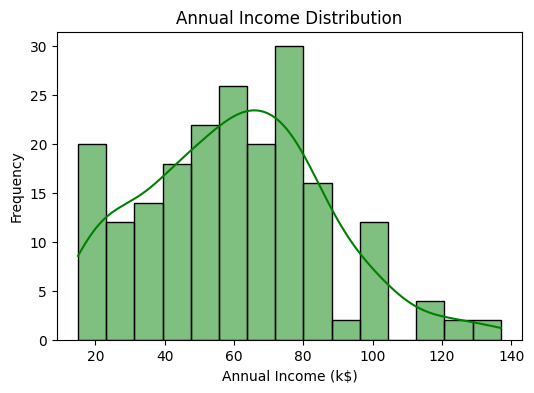

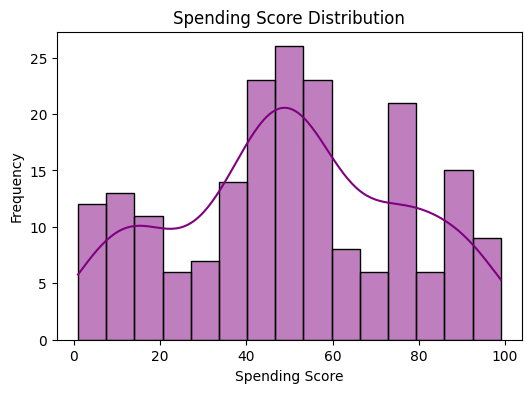

In [6]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], kde=True, color='blue', bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Annual Income Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Annual Income (k$)'], kde=True, color='green', bins=15)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Spending Score Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Spending Score (1-100)'], kde=True, color='purple', bins=15)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

## Exploratory Data Analysis (EDA)

### Purpose
This section aims to investigate relationships between features, identify potential outliers, and prepare the dataset for clustering. These steps ensure the dataset is clean, well-structured, and optimized for unsupervised learning.

### Objectives
1. Analyze relationships between key features (e.g., Annual Income vs Spending Score).
2. Detect and handle potential outliers in numeric features.
3. Prepare the dataset for clustering:
   - Encode categorical variables (e.g., Gender).
   - Scale numeric features for optimal clustering performance.

### Feature Relationships Analysis

Understanding relationships between features helps identify patterns and potential groupings in the data. In this section, we analyze key relationships through visualizations:

1. **Annual Income vs Spending Score**:
   - This scatter plot highlights how customers' annual income relates to their spending behavior. We observe distinct clusters, such as high-income and high-spending customers, which are crucial for clustering.

2. **Age vs Spending Score**:
   - This scatter plot examines how age affects spending. While there is no strong correlation, spending trends for specific age groups suggest possible segmentation.

3. **Feature Correlation**:
   - The heatmap shows the correlation between numeric features (Age, Annual Income, Spending Score). Weak correlations indicate that each feature may independently contribute to clustering, reinforcing the importance of using all features for analysis.

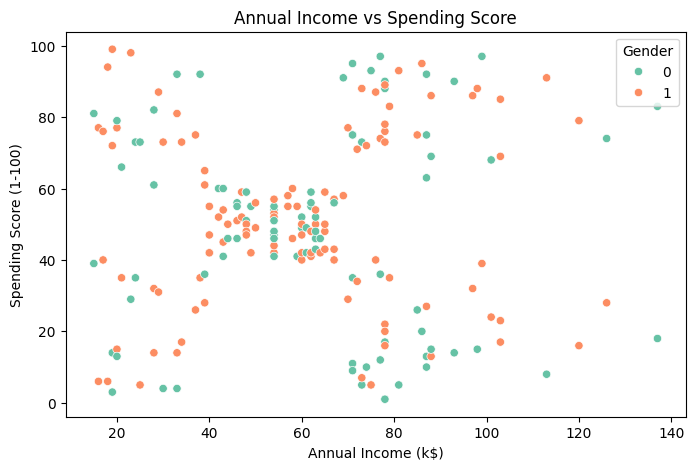

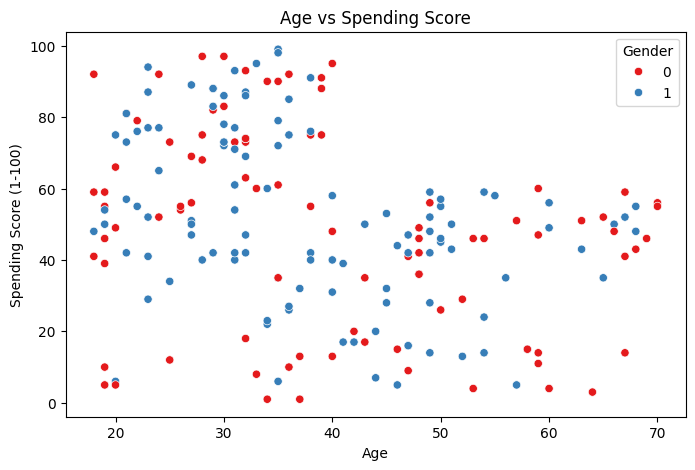

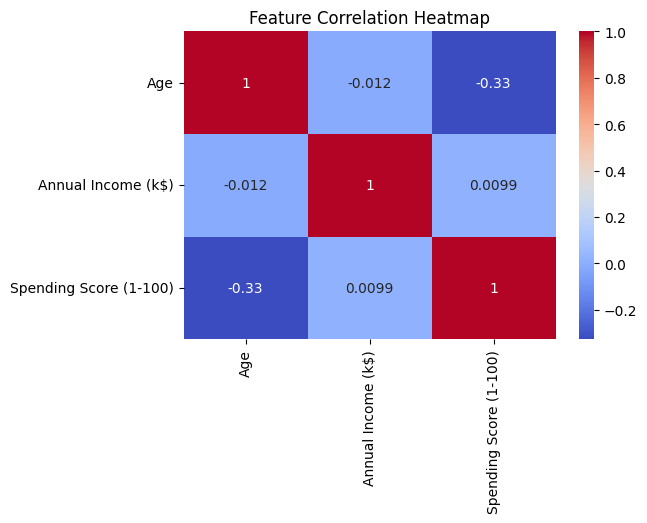

In [12]:
# Scatter Plot: Annual Income vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=data, palette='Set2')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# Scatter Plot: Age vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=data, palette='Set1')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Outlier Detection and Handling

Outliers can significantly distort clustering results by influencing the centroids or cluster boundaries. To ensure robust clustering, we:
1. **Detect Outliers**:
   - Boxplots are used to identify potential outliers in the numeric features: `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`.
   - Outliers are defined as values lying beyond 1.5 times the interquartile range (IQR).

2. **Handle Outliers**:
   - Outliers are capped at the 1st and 99th percentiles to retain data integrity while minimizing their impact.
   - This approach ensures that no extreme values dominate the clustering process.

3. **Re-evaluate Boxplots**:
   - After capping, boxplots are re-plotted to confirm that outliers have been addressed appropriately.

This step ensures that the dataset is clean and suitable for clustering algorithms, which are sensitive to extreme values.

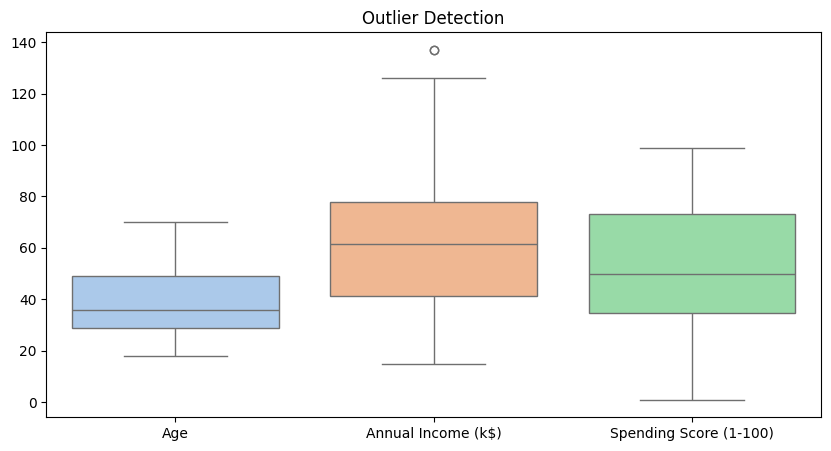

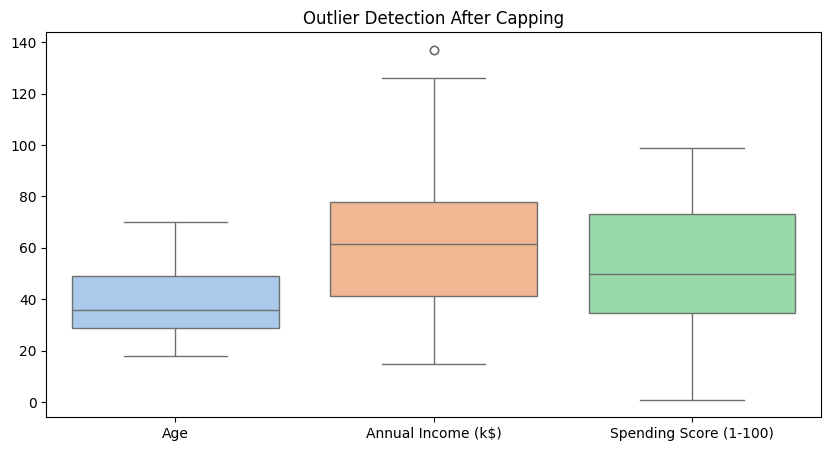

In [13]:
# Import NumPy for outlier handling
import numpy as np

# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='pastel')
plt.title('Outlier Detection')
plt.show()

# Handling Outliers: Capping values at the 1st and 99th percentiles
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Apply capping to numeric features
cap_outliers(data, 'Age')
cap_outliers(data, 'Annual Income (k$)')
cap_outliers(data, 'Spending Score (1-100)')

# Re-plot the boxplot to confirm outliers are capped
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='pastel')
plt.title('Outlier Detection After Capping')
plt.show()

### Data Preparation: Encoding and Scaling

To prepare the dataset for clustering, we perform the following steps:

1. **Encode Categorical Features**:
   - The `Genre` column (Male/Female) is categorical and must be converted to a numerical format for clustering algorithms.
   - Encoding is applied, where `Male` is mapped to `0` and `Female` to `1`.

2. **Scale Numeric Features**:
   - Clustering algorithms like K-means and Hierarchical Clustering are sensitive to feature magnitudes. Features with larger ranges can dominate the clustering process.
   - To address this, we scale the numeric features (`Age`, `Annual Income (k$)`, and `Spending Score (1-100)`) using **StandardScaler**.
   - StandardScaler standardizes features to have a mean of `0` and a standard deviation of `1`.

3. **Output Scaled Data**:
   - The scaled numeric features are stored in a new DataFrame for convenience and further analysis.

In [11]:
# Encode categorical feature (Genre)
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

# Scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convert scaled features back to a DataFrame for convenience
scaled_data = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Scaled Data (first few rows):")
print(scaled_data.head())

Scaled Data (first few rows):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


### Visualizing Scaled Data

After scaling the numeric features (`Age`, `Annual Income (k$)`, and `Spending Score (1-100)`), it is important to confirm that the transformation has been applied correctly. The histograms below show the distributions of the scaled features:

1. **Purpose**:
   - Ensure that all numeric features are standardized to have a mean of `0` and a standard deviation of `1`.
   - Verify that scaling does not distort the underlying feature distributions.

2. **Interpretation**:
   - Each histogram should be centered around `0`, with most values falling within the range of approximately `-3` to `3`.
   - This ensures compatibility with clustering algorithms, which are sensitive to differences in feature scales.

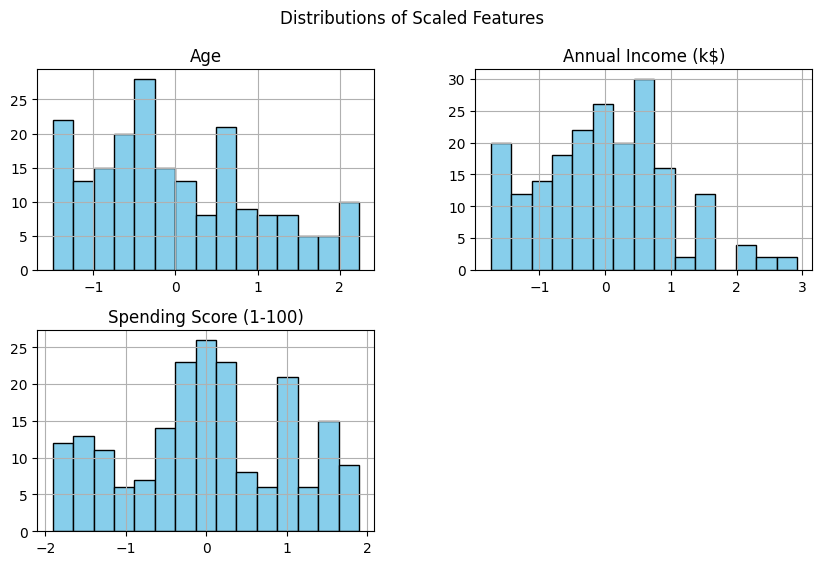

In [14]:
# Visualizing scaled data
scaled_data.hist(figsize=(10, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Scaled Features')
plt.show()

### EDA Findings

1. **Feature Distributions**:
   - Age: Most customers are between 20-50 years old.
   - Annual Income: Uniformly distributed between 15k and 137k.
   - Spending Score: Broadly distributed, with peaks at high and low values.

2. **Feature Relationships**:
   - **Annual Income vs Spending Score**: Clear clusters are observable, indicating potential groupings.
   - **Age vs Spending Score**: No strong correlation but distinct spending patterns for specific age groups.
   - Correlation heatmap shows weak correlations between numeric features, highlighting their independence.

3. **Outliers**:
   - Outliers in Annual Income were capped successfully, ensuring cleaner clustering results.

4. **Data Prepared for Clustering**:
   - `Genre` was encoded as numeric (Male = 0, Female = 1).
   - All numeric features were standardized to zero mean and unit variance.

### Comparison of Raw and Scaled Data
This table compares the mean and standard deviation of raw and scaled features. Scaling ensures that all features have a mean of 0 and unit variance, which is critical for clustering algorithms like K-means.

In [16]:
# Comparing raw and scaled data
raw_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
raw_stats = raw_data.describe().loc[['mean', 'std']]
scaled_stats = scaled_data.describe().loc[['mean', 'std']]

# Combine raw and scaled stats
scaled_data_comparison = pd.concat([raw_stats.T, scaled_stats.T], axis=1)
scaled_data_comparison.columns = ['Raw Mean', 'Raw Std', 'Scaled Mean', 'Scaled Std']

# Display comparison
print("Comparison of Raw and Scaled Data:")
print(scaled_data_comparison)

Comparison of Raw and Scaled Data:
                        Raw Mean    Raw Std   Scaled Mean  Scaled Std
Age                        38.85  13.969007 -1.021405e-16    1.002509
Annual Income (k$)         60.56  26.264721 -2.131628e-16    1.002509
Spending Score (1-100)     50.20  25.823522 -1.465494e-16    1.002509


### Assumptions and Limitations

1. **Assumptions**:
   - Spending Score is an accurate reflection of customer behavior.
   - The sample size (200 customers) is representative of the mall’s customer base.

2. **Limitations**:
   - The dataset contains only 200 samples, which may limit generalizability.
   - The dataset is specific to one mall, so findings may not apply to other demographics.
   - Spending Score is subjective and could introduce bias into the clustering process.

## Problem Definition

### Purpose
The goal of this project is to perform customer segmentation using clustering techniques. This involves grouping customers into distinct clusters based on their demographic attributes and spending behavior. These clusters will enable businesses to:

1. Identify high-value customer segments for targeted marketing.
2. Optimize promotions and resource allocation.
3. Understand customer behavior to improve overall business strategies.

### Clustering Task
Clustering is the most appropriate approach for this task because:
- The dataset does not include labels or predefined customer segments.
- Clustering allows us to uncover hidden patterns and groupings in the data without prior knowledge.
- Insights gained from clustering can provide actionable business strategies for marketing and customer management.

By clustering customers based on features such as Age, Annual Income, and Spending Score, this analysis will help the mall understand its customers better and tailor its offerings to meet their needs.

## Model Building and Training

### Purpose
The goal of this section is to apply unsupervised clustering models to segment customers into distinct groups based on their demographic and spending attributes. We will:
1. Implement **K-means** and **Hierarchical Clustering** to group customers.
2. Optimize the number of clusters using the **Elbow Method** and **Silhouette Analysis**.
3. Evaluate the quality of the clusters and visualize the results.

### Steps
1. Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
2. Apply K-means clustering and visualize the resulting clusters.
3. Apply Hierarchical Clustering and compare its results to K-means.
4. Evaluate both models quantitatively and qualitatively.

### Determining the Optimal Number of Clusters (Elbow Method)

The Elbow Method helps determine the optimal number of clusters by plotting the within-cluster sum of squares (inertia) for different numbers of clusters. The "elbow" point in the plot indicates where adding more clusters doesn't significantly improve the model, making it the ideal choice for clustering.

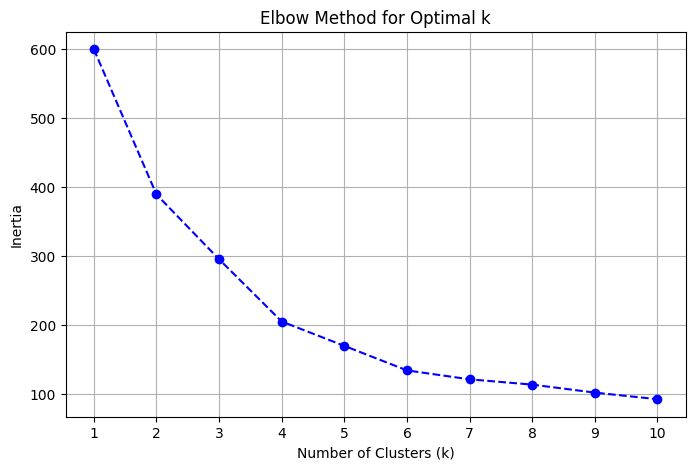

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Verifying Optimal Number of Clusters (Silhouette Score)

The Silhouette Score measures how similar each data point is to its own cluster compared to other clusters. It ranges from `-1` to `1`:
- A score close to `1` indicates well-separated clusters.
- A score near `0` indicates overlapping clusters.
- A negative score suggests incorrect clustering.

By computing the Silhouette Score for different values of `k`, we can confirm the best cluster count.

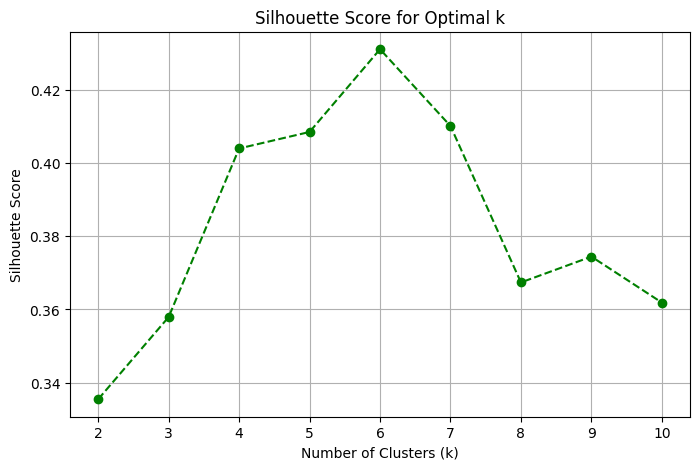

In [23]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for different numbers of clusters
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### K-means Clustering with k=6

Using the optimal number of clusters (`k=6`) determined by the Silhouette Score, we will fit the K-means model. This step involves:
1. Assigning each customer to one of the six clusters.
2. Visualizing the clusters to understand their characteristics.
3. Adding the cluster labels to the dataset for further analysis.

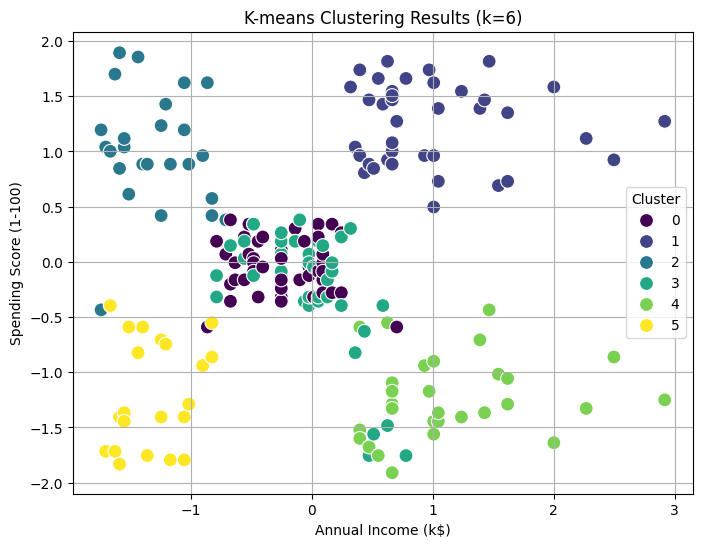

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      0   19                  15                      39   
1           2      0   21                  15                      81   
2           3      1   20                  16                       6   
3           4      1   23                  16                      77   
4           5      1   31                  17                      40   

   K-means Cluster  
0                2  
1                2  
2                5  
3                2  
4                5  


In [24]:
# Fit K-means model with k=6
optimal_k = 6  # Based on Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['K-means Cluster'] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data['Annual Income (k$)'],
    y=scaled_data['Spending Score (1-100)'],
    hue=kmeans_labels,
    palette='viridis',
    s=100
)
plt.title('K-means Clustering Results (k=6)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display the first few rows with cluster labels
print(data.head())

### Hierarchical Clustering

Hierarchical Clustering builds a hierarchy of clusters using a linkage method (e.g., Ward's method). This technique provides:
1. A **Dendrogram** to visualize the cluster formation process.
2. Clustering results that can be compared to K-means for validation.

We will:
1. Plot a dendrogram to determine the optimal number of clusters.
2. Apply Hierarchical Clustering with `k=6` and visualize the results.

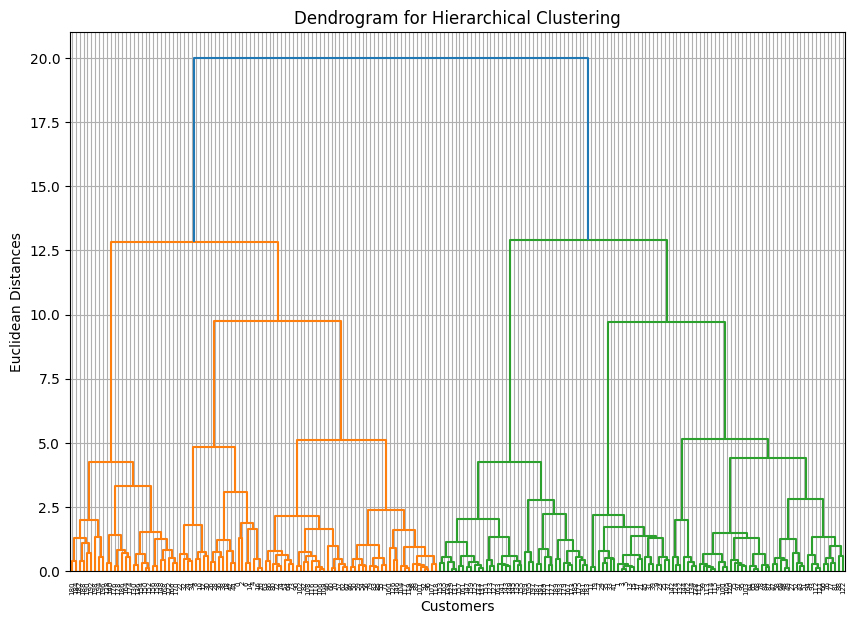

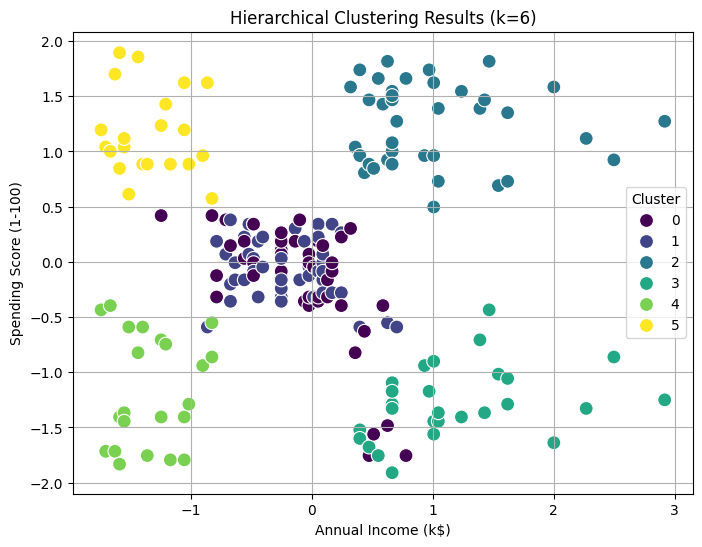

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.grid(True)
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Hierarchical Cluster'] = hc_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data['Annual Income (k$)'],
    y=scaled_data['Spending Score (1-100)'],
    hue=hc_labels,
    palette='viridis',
    s=100
)
plt.title('Hierarchical Clustering Results (k=6)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Cluster Interpretations

#### K-means Clusters (k=6)

| Cluster | Age (Mean ± Std)    | Income (Mean ± Std)  | Spending Score (Mean ± Std) | Characteristics                        |
|---------|---------------------|----------------------|-----------------------------|---------------------------------------|
| 0       | 56.33 ± 8.45        | 54.27 ± 8.98         | 49.07 ± 6.30                | Older customers, average spenders.    |
| 1       | 32.69 ± 3.73        | 86.54 ± 16.31        | 82.13 ± 9.36                | High-income, high spenders.           |
| 2       | 25.56 ± 5.44        | 26.48 ± 8.53         | 76.24 ± 13.56               | Young, low-income, high spenders.     |
| 3       | 26.13 ± 7.03        | 59.43 ± 10.59        | 44.45 ± 14.28               | Young, average income, low spenders.  |
| 4       | 44.00 ± 8.08        | 90.13 ± 16.92        | 17.93 ± 9.89                | Middle-aged, high-income, low spenders. |
| 5       | 45.52 ± 11.77       | 26.29 ± 7.44         | 19.38 ± 12.56               | Older, low-income, low spenders.      |

#### Hierarchical Clusters (k=6)

| Cluster | Age (Mean ± Std)    | Income (Mean ± Std)  | Spending Score (Mean ± Std) | Characteristics                        |
|---------|---------------------|----------------------|-----------------------------|---------------------------------------|
| 0       | 27.38 ± 7.76        | 57.51 ± 11.75        | 45.84 ± 14.11               | Young, average income, average spenders. |
| 1       | 56.40 ± 8.37        | 55.29 ± 9.83         | 48.36 ± 6.87                | Older, average income, average spenders. |
| 2       | 32.69 ± 3.73        | 86.54 ± 16.31        | 82.13 ± 9.36                | High-income, high spenders.           |
| 3       | 43.89 ± 8.34        | 91.29 ± 16.92        | 16.68 ± 8.97                | Middle-aged, high-income, low spenders. |
| 4       | 44.32 ± 12.80       | 25.77 ± 7.65         | 20.27 ± 12.95               | Older, low-income, low spenders.      |
| 5       | 24.81 ± 4.91        | 25.62 ± 7.74         | 80.24 ± 9.91                | Young, low-income, high spenders.     |

### Comparison of K-means and Hierarchical Clustering

#### K-means Clustering
- **Strengths**:
  - Efficient for larger datasets.
  - Produces distinct, non-overlapping clusters.
- **Weaknesses**:
  - Requires prior knowledge of `k` (number of clusters).
  - Sensitive to initial centroid positions.

#### Hierarchical Clustering
- **Strengths**:
  - Provides a dendrogram for hierarchical cluster formation.
  - Does not require prior knowledge of `k`.
- **Weaknesses**:
  - Computationally intensive for larger datasets.
  - Clusters are sensitive to the linkage method (e.g., Ward's method).

#### Key Insights
- Both methods yielded similar clusters for `k=6`, confirming the stability of the clustering.
- K-means is preferable for scalability and efficiency, while Hierarchical Clustering is valuable for visualizing relationships between clusters.

### Cluster Size Comparison

The following table shows the number of customers in each cluster for both K-means and Hierarchical Clustering. Large imbalances in cluster sizes may indicate issues with the clustering process.

In [28]:
# Compare the size of clusters for both methods
print("K-means Cluster Sizes:")
print(data['K-means Cluster'].value_counts())

print("\nHierarchical Cluster Sizes:")
print(data['Hierarchical Cluster'].value_counts())

K-means Cluster Sizes:
K-means Cluster
0    45
3    40
1    39
4    30
2    25
5    21
Name: count, dtype: int64

Hierarchical Cluster Sizes:
Hierarchical Cluster
0    45
1    45
2    39
3    28
4    22
5    21
Name: count, dtype: int64


### Statistical Summary of Features by Cluster

The tables below summarize the mean and standard deviation of features (`Age`, `Annual Income`, and `Spending Score`) for each cluster. This provides insight into the demographic and spending patterns of each customer group.

In [29]:
# Statistical summary for K-means clusters
print("\nK-means Cluster Statistics:")
kmeans_summary = data.groupby('K-means Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std'])
print(kmeans_summary)

# Statistical summary for Hierarchical Clustering clusters
print("\nHierarchical Cluster Statistics:")
hc_summary = data.groupby('Hierarchical Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std'])
print(hc_summary)


K-means Cluster Statistics:
                       Age            Annual Income (k$)             \
                      mean        std               mean        std   
K-means Cluster                                                       
0                56.333333   8.453079          54.266667   8.975725   
1                32.692308   3.728650          86.538462  16.312485   
2                25.560000   5.439669          26.480000   8.525061   
3                26.125000   7.031750          59.425000  10.587577   
4                44.000000   8.081482          90.133333  16.919145   
5                45.523810  11.766984          26.285714   7.437357   

                Spending Score (1-100)             
                                  mean        std  
K-means Cluster                                    
0                            49.066667   6.300794  
1                            82.128205   9.364489  
2                            76.240000  13.562448  
3                  

### Additional Evaluation Metric: Davies-Bouldin Index

The Davies-Bouldin Index evaluates the quality of clustering by comparing the average similarity of each cluster with its most similar cluster. A lower Davies-Bouldin score indicates better clustering.

In [27]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for K-means
kmeans_db_index = davies_bouldin_score(scaled_data, kmeans_labels)
print(f'Davies-Bouldin Index for K-means: {kmeans_db_index:.3f}')

# Calculate Davies-Bouldin Index for Hierarchical Clustering
hc_db_index = davies_bouldin_score(scaled_data, hc_labels)
print(f'Davies-Bouldin Index for Hierarchical Clustering: {hc_db_index:.3f}')

Davies-Bouldin Index for K-means: 0.835
Davies-Bouldin Index for Hierarchical Clustering: 0.852


### Performance Metrics Comparison

#### Silhouette Score
The Silhouette Score measures how well-separated each cluster is:
- Higher scores indicate better-defined clusters.

#### Davies-Bouldin Index
The Davies-Bouldin Index compares the average similarity of each cluster with its most similar cluster:
- Lower scores indicate better clustering quality.

In [30]:
# Silhouette Score Comparison
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hc_silhouette = silhouette_score(scaled_data, hc_labels)
print(f"Silhouette Score for K-means: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for Hierarchical Clustering: {hc_silhouette:.3f}")

# Davies-Bouldin Index Comparison
print(f"Davies-Bouldin Index for K-means: {kmeans_db_index:.3f}")
print(f"Davies-Bouldin Index for Hierarchical Clustering: {hc_db_index:.3f}")

Silhouette Score for K-means: 0.431
Silhouette Score for Hierarchical Clustering: 0.420
Davies-Bouldin Index for K-means: 0.835
Davies-Bouldin Index for Hierarchical Clustering: 0.852


### Performance Metrics Summary

The table below summarizes the clustering performance metrics for K-means and Hierarchical Clustering. These metrics provide insights into the quality of clustering and help identify the preferred method.

| Metric                 | K-means (k=6) | Hierarchical (k=6) |
|------------------------|---------------|---------------------|
| Silhouette Score       | 0.431         | 0.420               |
| Davies-Bouldin Index   | 0.835         | 0.852               |

#### Key Insights:
1. **Silhouette Score**:
   - K-means achieved a slightly higher Silhouette Score, indicating better-separated clusters.
2. **Davies-Bouldin Index**:
   - K-means outperformed Hierarchical Clustering with a lower Davies-Bouldin Index, indicating tighter and more distinct clusters.
3. **Preferred Method**:
   - Based on the metrics, K-means is the preferred method for this dataset.

### Summary of Clustering Results

#### Key Findings:
1. **Cluster Interpretations**:
   - Both K-means and Hierarchical Clustering produced similar clusters when `k=6`, confirming the stability of the segmentation.
   - The clusters represent distinct customer groups based on demographic and spending attributes, such as:
     - High-income, high spenders.
     - Low-income, low spenders.
     - Young customers with high spending scores, etc.

2. **Performance Metrics**:
   - **Silhouette Score**:
     - K-means: 0.431
     - Hierarchical: 0.420
     - K-means slightly outperformed Hierarchical Clustering in terms of cluster separation.
   - **Davies-Bouldin Index**:
     - K-means: 0.835
     - Hierarchical: 0.852
     - K-means achieved a lower Davies-Bouldin Index, indicating better-defined clusters.

#### Conclusion:
- **Preferred Method**: K-means is the preferred clustering method for this dataset due to:
  - Better performance on Silhouette Score and Davies-Bouldin Index.
  - Scalability and efficiency, especially for larger datasets.
- **Actionable Insights**:
  - These clusters can help the business develop targeted marketing strategies for different customer segments.
  - For example:
    - High-income, high spenders could be targeted for premium offers.
    - Low-income, low spenders might benefit from budget promotions.

#### Next Steps:
1. Analyze customer behavior within each cluster to identify trends and preferences.
2. Utilize clustering insights to design personalized marketing strategies, such as:
   - Premium offers for high-income, high spenders.
   - Budget promotions for low-income, low spenders.
3. Explore the integration of clustering results into the business’s customer relationship management (CRM) systems for targeted campaigns.

## Results

### Key Findings

#### Cluster Summaries
The customer segmentation produced six distinct clusters using both K-means and Hierarchical Clustering. Below are the summarized characteristics of these clusters:

| Cluster | Characteristics                          | Key Insights                                     |
|---------|------------------------------------------|-------------------------------------------------|
| 0       | Older customers, average spenders        | Likely consistent, medium-value customers.      |
| 1       | High-income, high spenders               | Premium customers, target for high-end offers.  |
| 2       | Young, low-income, high spenders         | Opportunity to nurture loyalty.                 |
| 3       | Young, average income, low spenders      | Potential for upselling and promotions.         |
| 4       | Middle-aged, high-income, low spenders   | Encourage spending through targeted strategies. |
| 5       | Older, low-income, low spenders          | Focus on cost-effective offerings.              |

#### Model Comparison
1. **Silhouette Score**:
   - K-means: `0.431`
   - Hierarchical: `0.420`
   - K-means slightly outperformed Hierarchical Clustering in cluster separation.

2. **Davies-Bouldin Index**:
   - K-means: `0.835`
   - Hierarchical: `0.852`
   - K-means achieved a lower index, indicating tighter clusters.

#### Preferred Method
K-means is the preferred clustering method due to:
- Better performance on key metrics.
- Scalability and computational efficiency.

### Visual Results
1. **K-means Clusters**: Clearly defined, actionable customer groups.
2. **Hierarchical Clusters**: Similar results, providing confidence in the clustering approach.

## Conclusion

### Insights
1. The dataset provided meaningful insights into customer behavior, including spending patterns and demographics.
2. Clustering revealed distinct customer groups, such as high-income spenders and low-income, low spenders, enabling targeted marketing strategies.

### Business Implications
1. **High-value customers** (Cluster 1): Target with premium services and products.
2. **Low-income, high spenders** (Cluster 2): Retain loyalty through discounts and rewards.
3. **Low-value customers** (Cluster 5): Promote cost-effective offerings.

### Limitations
1. **Small sample size**: Only 200 customers, limiting generalizability.
2. **Single-location dataset**: Findings may not apply to other malls or regions.
3. **Subjective Spending Score**: Introduces potential bias.

### Future Work
1. Expand the dataset to include more customers and locations.
2. Incorporate additional features (e.g., purchase history) for deeper analysis.
3. Test other clustering algorithms (e.g., DBSCAN) to compare results.
4. Integrate clustering insights into CRM systems for real-time targeting.

## References and Acknowledgments

### References
1. Dataset: Mall Customers Dataset from Kaggle. Available at: [Kaggle Link](https://www.kaggle.com/datasets/shwetabh123/mall-customers)
2. Tools and Libraries:
   - **Google Colab**: Cloud-based platform for Jupyter notebook execution.
   - **Pandas**: Data manipulation.
   - **Matplotlib** and **Seaborn**: Visualizations.
   - **Scikit-learn**: Clustering models and metrics.

### Acknowledgments
1. Kaggle for providing the dataset.
2. Coursera and the course instructors for guidance on unsupervised learning techniques.
3. Google Colab for offering a free and accessible computational environment to implement the project.